# Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load dataset
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


# Exploratory Data Analysis (EDA)

In [4]:
# Convert date_time column to datetime
df['date_time'] = pd.to_datetime(df['date_time'])

In [5]:
# Basic info and null values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB
None
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weath

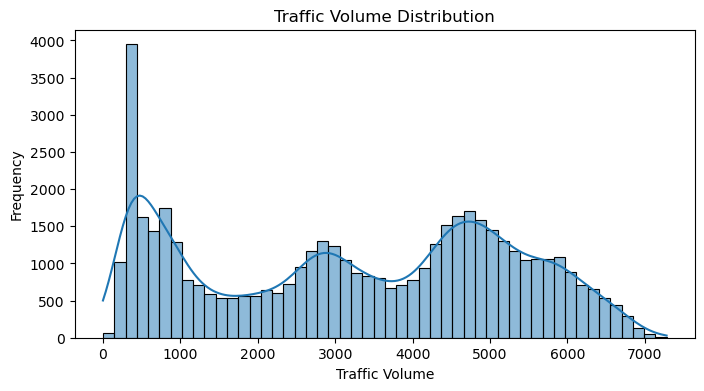

In [6]:
# Traffic volume distribution
plt.figure(figsize=(8,4))
sns.histplot(df['traffic_volume'], bins=50, kde=True)
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

In [7]:
# Extract time-based features
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

In [8]:
# Drop columns not needed
df = df.drop(['date_time', 'weather_description'], axis=1)

In [9]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['holiday', 'weather_main'], drop_first=True)

In [10]:
# Drop any rows with missing data
df.dropna(inplace=True)

# Correlation and Feature Importance

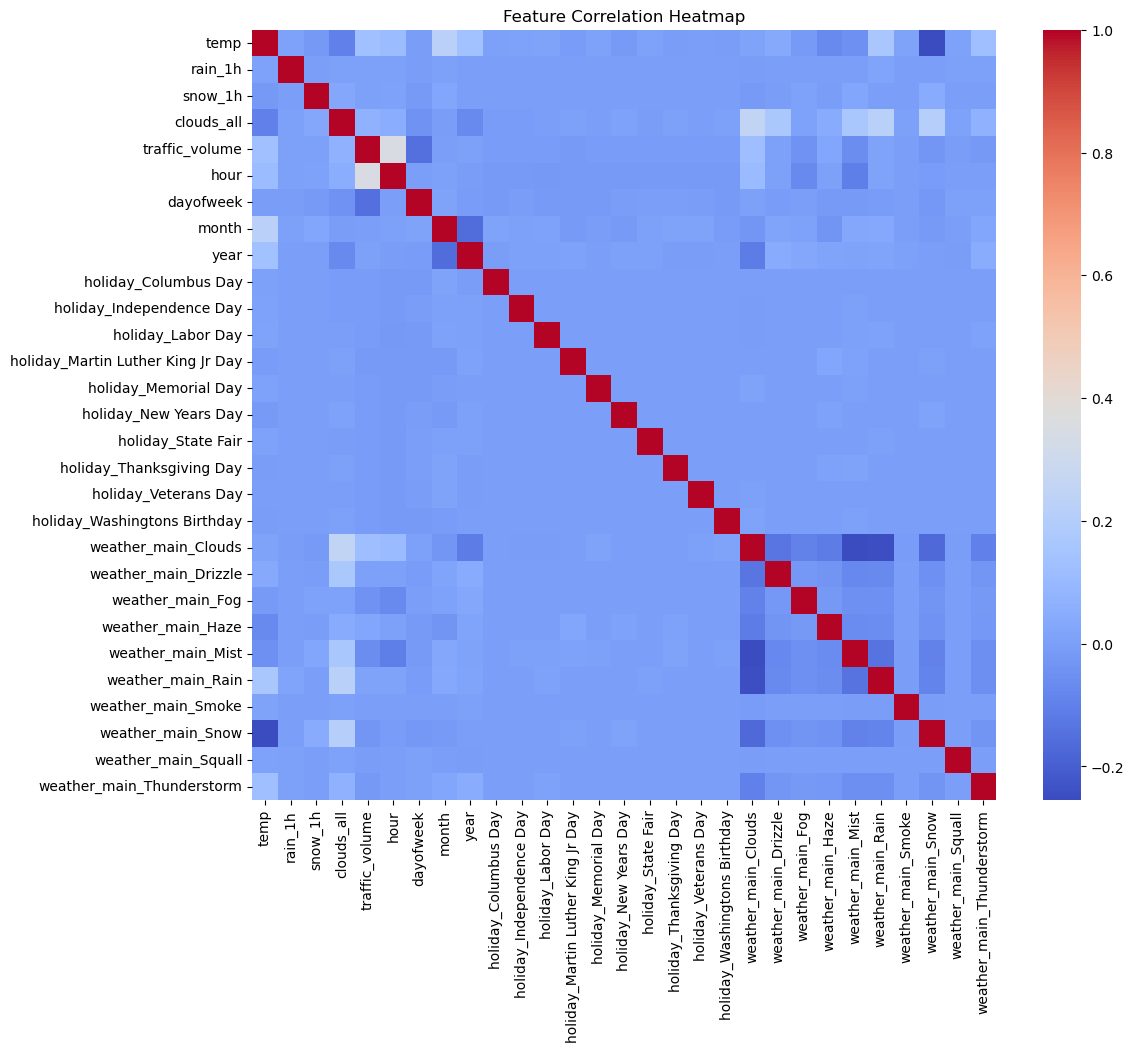

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preparation

In [15]:
# Features and target
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression Models

# Model 1: Linear Regression

In [18]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Model 2: Random Forest

In [19]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation

In [20]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print()

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Linear Regression ---
Mean Squared Error: 3279310.5888719647
Mean Absolute Error: 1588.537167749587
R² Score: 0.17053260603111786

--- Random Forest ---
Mean Squared Error: 183466.70130993272
Mean Absolute Error: 226.40471457712843
R² Score: 0.9535940123719832

